In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import pandas as pd
import scipy
from stable_baselines import PPO2
from codes.environment.multichannel import SimpleCavityEnv
from stable_baselines.common.vec_env import SubprocVecEnv
import numpy as np
import qutip as qt
import matplotlib
import matplotlib.pyplot as plt
from codes.functions.check_policy import load_info
import os
import json
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
import os
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes, InsetPosition, BboxPatch, BboxConnector
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.dpi': 150})
import seaborn as sns
def make_env(args, i):
    def _init():
        env = SimpleCavityEnv(args, counter=i,testing=True)
        return env
    return _init

import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')








plt.style.use('seaborn') 
fontsize = 10

mpl_settings = {
    'text.usetex': False,
    'font.family': 'serif',
    'pgf.texsystem': 'pdflatex',
    'font.size': fontsize,
    
    'axes.labelsize': fontsize,               # -> axis labels
    'legend.fontsize': fontsize,              # -> legends
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'ytick.major.size': 3,
    'xtick.major.size': 3,
    'axes.linewidth': 2,
    'axes.edgecolor': "0.15",
    'figure.dpi': 300
}


plt.rcParams.update(mpl_settings)


rhos = np.load("data/rhos_different_phases.npy")
probabilities = np.load("data/probabilities_different_phases.npy")
actions = np.load("data/action_different_phasess.npy")
fidelities = np.load("data/fidelities_different_phases.npy")

/u/pori/.conda/envs/conda_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/u/pori/.conda/envs/conda_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/u/pori/.conda/envs/conda_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/u/pori/.conda/envs/conda_env/lib/python3.7/site-packages/ten

In [2]:
folder="/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer"




subfolders=([x for x in sorted(os.listdir(folder)) if x  not in ["summaries", "current"]])
num_subfolders = len(subfolders)
models=np.zeros((num_subfolders), dtype=object)
args=np.zeros((num_subfolders), dtype=object)
summaries=np.zeros((num_subfolders), dtype=object)
phases=np.zeros(num_subfolders)

num_init = -1
for index,fold in enumerate(subfolders):

    direc=folder+"/"+fold
    print(direc)
    phases[index] = float(direc.split("_")[-1])
    args[index] = load_info(direc, print=False)
    last_model="rl_model_"+ str(sorted([int(x.split("_")[2]) for x in os.listdir(direc+"/model")])[-1])+"_steps"
    
    flag = False
    num = num_init
    while flag is False:
        try:
            last_model="rl_model_"+ str(sorted([int(x.split("_")[2]) for x in os.listdir(direc+"/model")])[num])+"_steps"
            models[index]=PPO2.load(direc+"/model/"+last_model)
            flag = True
            print("Success")
        except:
            num-=1    
    summaries[index]=np.load(folder+"/summaries/summary_state_1_3_training_"+str(direc.split("_")[-1])+ ".npy",allow_pickle=True).item()
    

    
folder="/ptmp/pori/simulations/2021-05-12_1_3_different_phases_v2"




subfolders=([x for x in sorted(os.listdir(folder)) if x  not in ["summaries", "current"]])
num_subfolders = len(subfolders)

num_init = -1
for index,fold in enumerate(subfolders):
    if index==0:
        direc=folder+"/"+fold
        print(direc)
        phases[index] = float(direc.split("_")[-1])
        args[index] = load_info(direc, print=False)
        last_model="rl_model_"+ str(sorted([int(x.split("_")[2]) for x in os.listdir(direc+"/model")])[-1])+"_steps"

        flag = False
        num = num_init
        while flag is False:
            try:
                last_model="rl_model_"+ str(sorted([int(x.split("_")[2]) for x in os.listdir(direc+"/model")])[num])+"_steps"
                models[index]=PPO2.load(direc+"/model/"+last_model)
                flag = True
                print("Success")
            except:
                num-=1    
        summaries[index]=np.load(folder+"/summaries/summary_state_1_3_training_"+str(direc.split("_")[-1])+ ".npy",allow_pickle=True).item()

  

/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_0.0
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_0.1
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_0.2
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_0.4
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_0.5
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulatio

Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_0.8
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_1.0
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_1.1
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_1.2
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_1.3
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/s

Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_1.7
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_1.8
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_1.9
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_2.0
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_2.2
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/s

Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_2.5
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_2.6
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_2.8
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_2.9
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_3.1
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/s

Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_3.5
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_3.6
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_3.7
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_3.8
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_4.0
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/s

Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_4.3
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_4.4
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_4.6
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_4.7
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_4.8
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/s

Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_5.2
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_5.3
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_5.4
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_5.5
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_5.6
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/s

Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_6.0
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-15_1_3_different_phases_longer/state_1_3_training_6.1
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
/ptmp/pori/simulations/2021-05-12_1_3_different_phases_v2/state_1_3_training_0.0
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success


In [3]:
ntraj=50


args= load_info(direc, print=False)
args["T_max"]=args["T_max"]*5
args["timesteps"]=int(args["timesteps"]*5)
args["multiplier"]=args["multiplier"]*5
env = SubprocVecEnv([make_env(args, i) for i in range(ntraj)], start_method="fork")
timesteps=env.get_attr("T")[0]
Nstates=env.get_attr("Nstates")[0]
substeps=env.get_attr("numberPhysicsMicroSteps")[0]
num_actions=env.get_attr("num_actions")[0]




rhos=np.zeros((len(models), ntraj, timesteps, Nstates, Nstates), dtype="complex")
probabilities = np.zeros((len(models), ntraj, Nstates, timesteps*substeps ))
actions = np.zeros((len(models), ntraj, num_actions, timesteps ))
fidelities = np.zeros((len(models), ntraj, timesteps ))

for j in range(len(models)):
    if (j%13==0):
        print(j)
        direc = folder + "/" + subfolders[j]
        args= load_info(direc, print=False)
        args["T_max"]=args["T_max"]*5
        args["timesteps"]=int(args["timesteps"]*5)
        args["multiplier"]=args["multiplier"]*5
        env = SubprocVecEnv([make_env(args, i) for i in range(ntraj)], start_method="fork")
        model = models[j]

        obs=env.reset()
        for i in range(args["timesteps"]):
            action=model.predict(obs, deterministic=True)
            rhos[j, :, i]=env.get_attr("Rho")
            obs, r, done, _ =env.step(action[0])

        probabilities[j] = np.array(env.get_attr("probabilities"))
        actions[j]=np.array(env.get_attr("actions_plot"))
        fidelities[j]=np.array(env.get_attr("fidelities"))
        env.close()



0
13
26
39


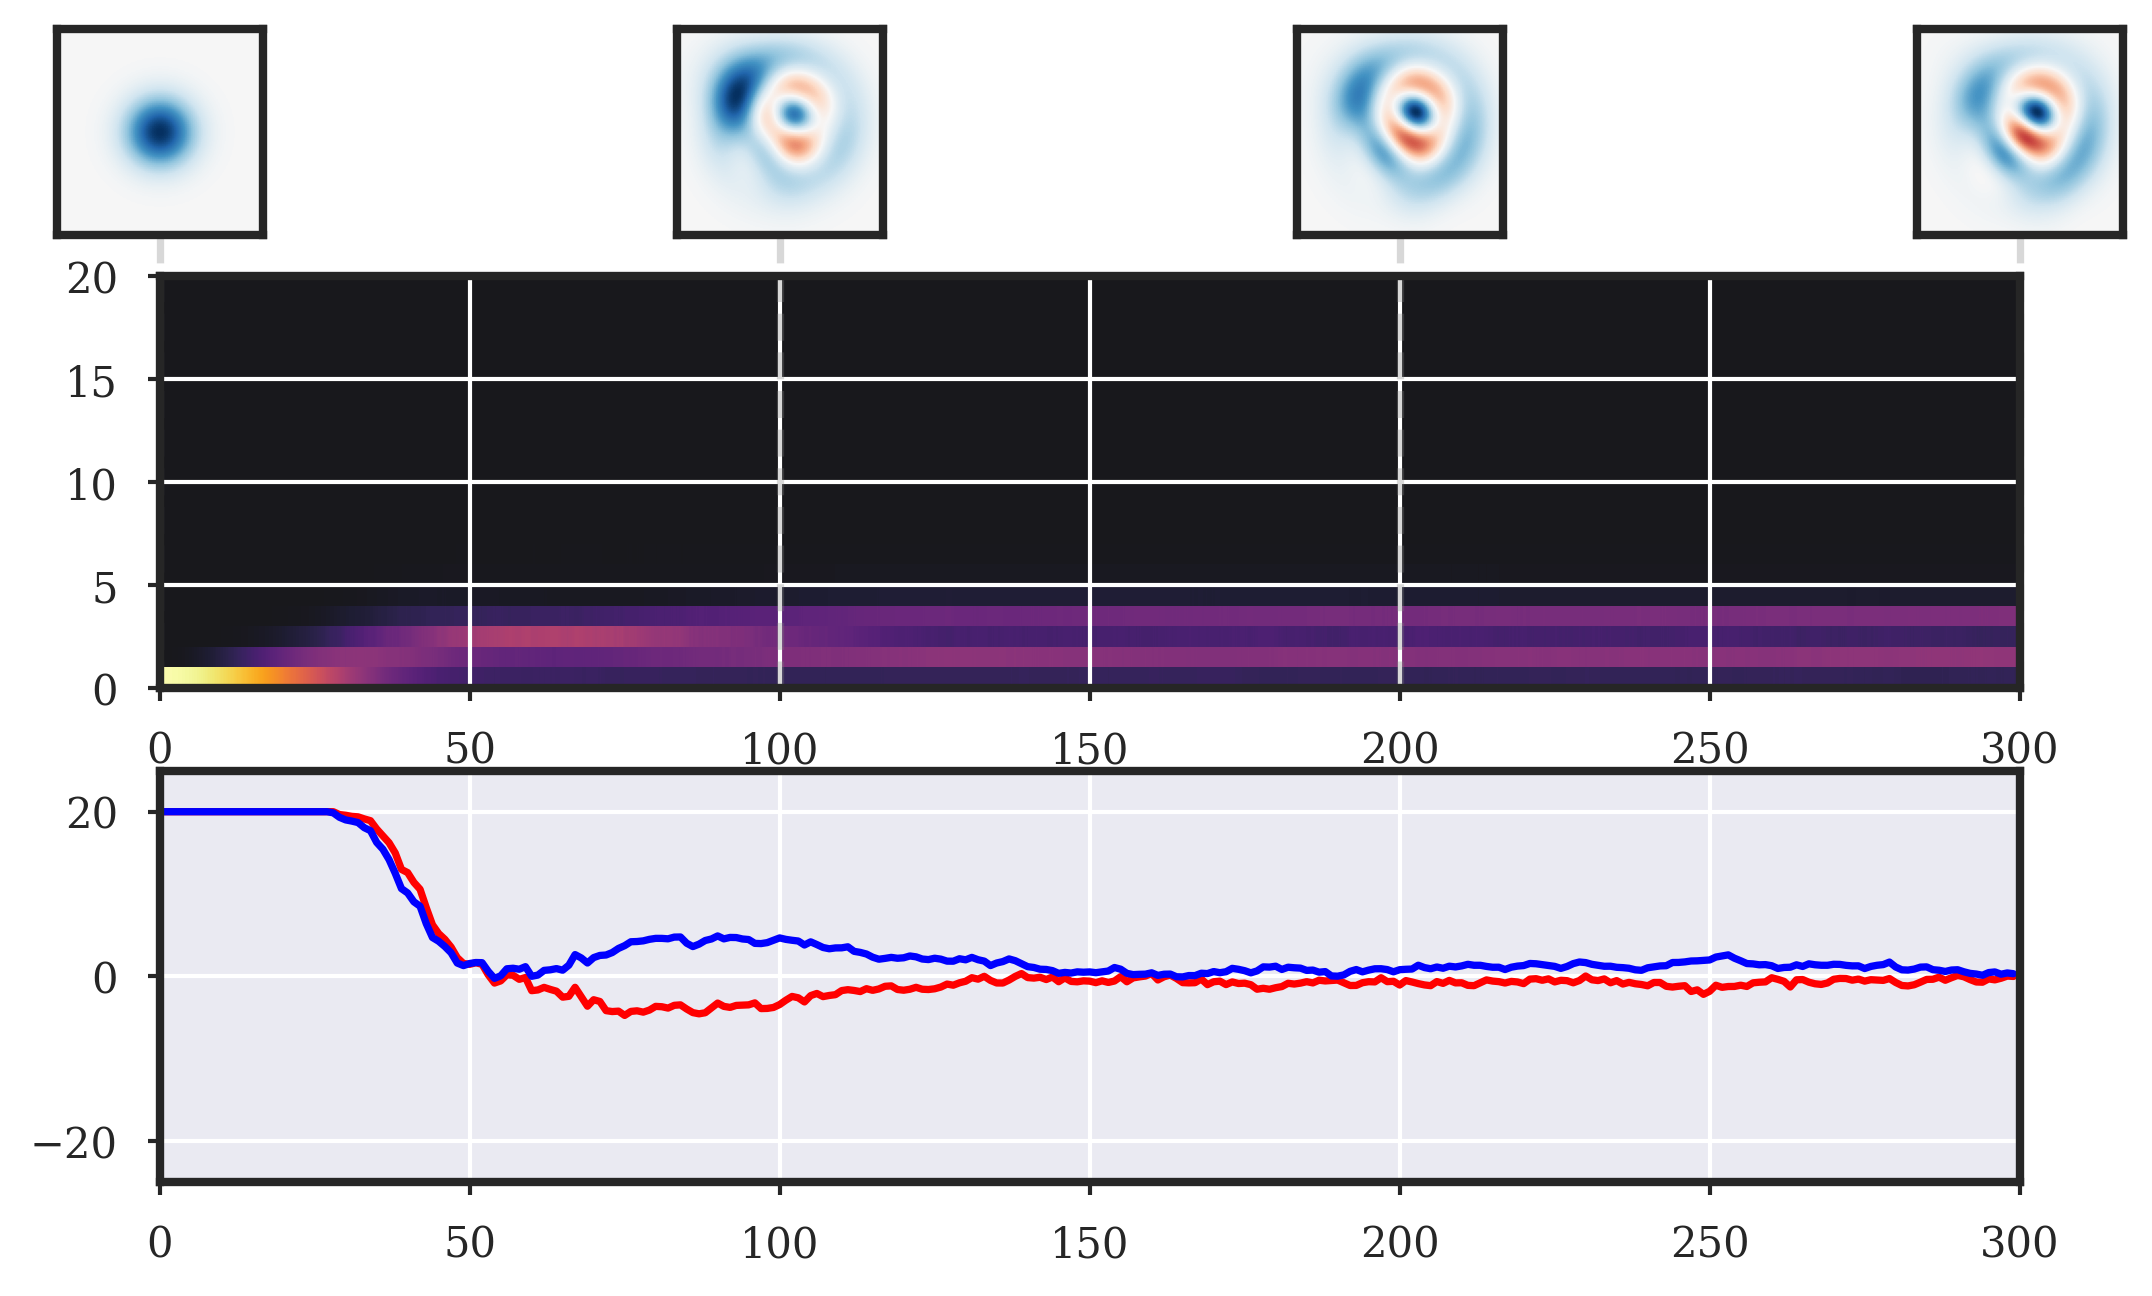

In [20]:
%matplotlib inline
fig = plt.figure(figsize=(8,4), dpi= 300)


ax = plt.subplot(211)
num_traj=0
timesteps_partial=300
Nstates_partial=20
substeps=10


#ax.imshow( np.transpose(np.abs(np.diagonal(rhos,axis1=1, axis2=2))[:timesteps,:Nstates]),
ax.imshow(probabilities.mean(axis=0)[:Nstates_partial,:timesteps_partial*substeps],
                                       origin='lower',
                                       aspect='auto', 
                                       vmin=0,
                                       vmax=1,
                                       cmap="inferno",
                                       alpha=0.9, interpolation="none",
                                       extent=(0, timesteps_partial, 0, Nstates_partial)
                                    )
ax.set_xlim(0, timesteps_partial)
ax.set_ylim(0, Nstates_partial)

#ax.text(timesteps,Nstates+1,"Mean fidelity: \n{}".format(round(np.mean(np.array(fidelities)[:,:,timesteps_partial-1]),4)),ha="center", color="red")


for t_target in [0, int(timesteps_partial/3), int(timesteps_partial/3*2), int(timesteps_partial)]:
    ax.vlines(t_target, 0, Nstates_partial+2, 
              linestyle = "dashed", 
              color = "gray", 
              alpha = 0.3, clip_on=False)

    
    
    offset = 0.25
    frac = t_target / timesteps_partial
    subax = inset_axes(ax, width="100%", height="100%",
                   bbox_to_anchor=(frac-offset, 1.1, .5, .5),
                   bbox_transform=ax.transAxes, loc=2, borderpad=0)
    #subax.axis('off')
    subax.set_xticks([])
    subax.set_yticks([])
    xwigner = np.linspace(-3, 3, 100)
    wigner = qt.wigner( qt.Qobj(rhos.mean(axis=0)[t_target]), xwigner, xwigner,)
    subax.imshow(wigner,
                cmap="RdBu", vmin=-np.max(np.abs(wigner)), vmax=np.max(np.abs(wigner)))




ax = plt.subplot(212)
ax.set_xlim(0,timesteps_partial)
ax.set_ylim(-25,25)
ax.plot(actions.mean(axis=0)[0,:timesteps_partial], label="Real", color="red")
ax.plot(actions.mean(axis=0)[1,:timesteps_partial], label="Img", color="blue")

# ax=fig.add_subplot(gs[2, :])
# for index, action in enumerate(range(2,6)):
#     ax.set_xlim(0,timesteps_partial)
#     ax.set_ylim(0,1)
#     ax.plot(actions[0, action,:timesteps_partial], label="Meas {}".format(index))
# ax.legend()
#plt.tight_layout()



    


plt.show()

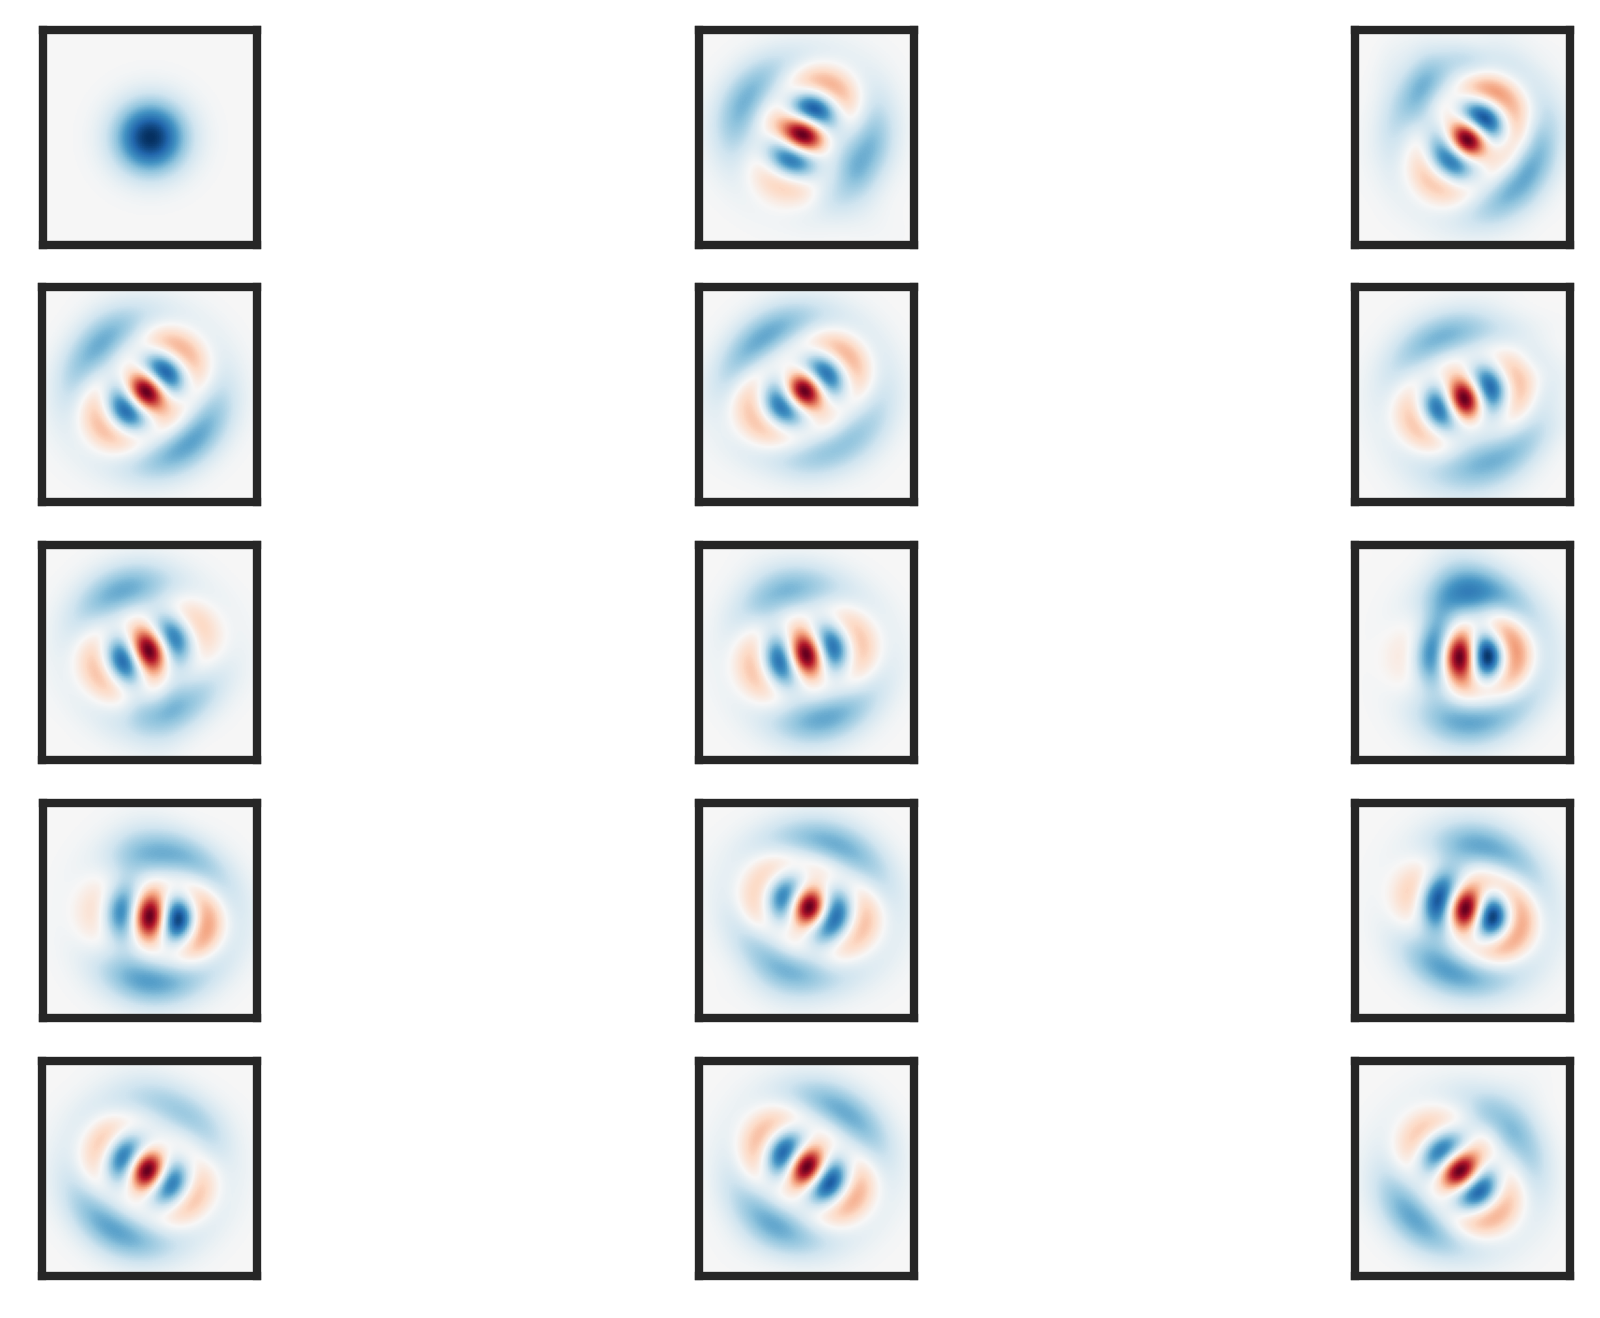

In [6]:
fig, ax = plt.subplots(5, 3)
count = 0
for i in range(5):
    for j in range(3):

        subax= ax[i, j]

        subax.set_xticks([])
        subax.set_yticks([])
        xwigner = np.linspace(-3, 3, 100)
        wigner = qt.wigner( qt.Qobj(rhos.mean(axis=1)[count, -1]), xwigner, xwigner,)
        subax.imshow(wigner,
                    cmap="RdBu", vmin=-np.max(np.abs(wigner)), vmax=np.max(np.abs(wigner)))
        count+=1


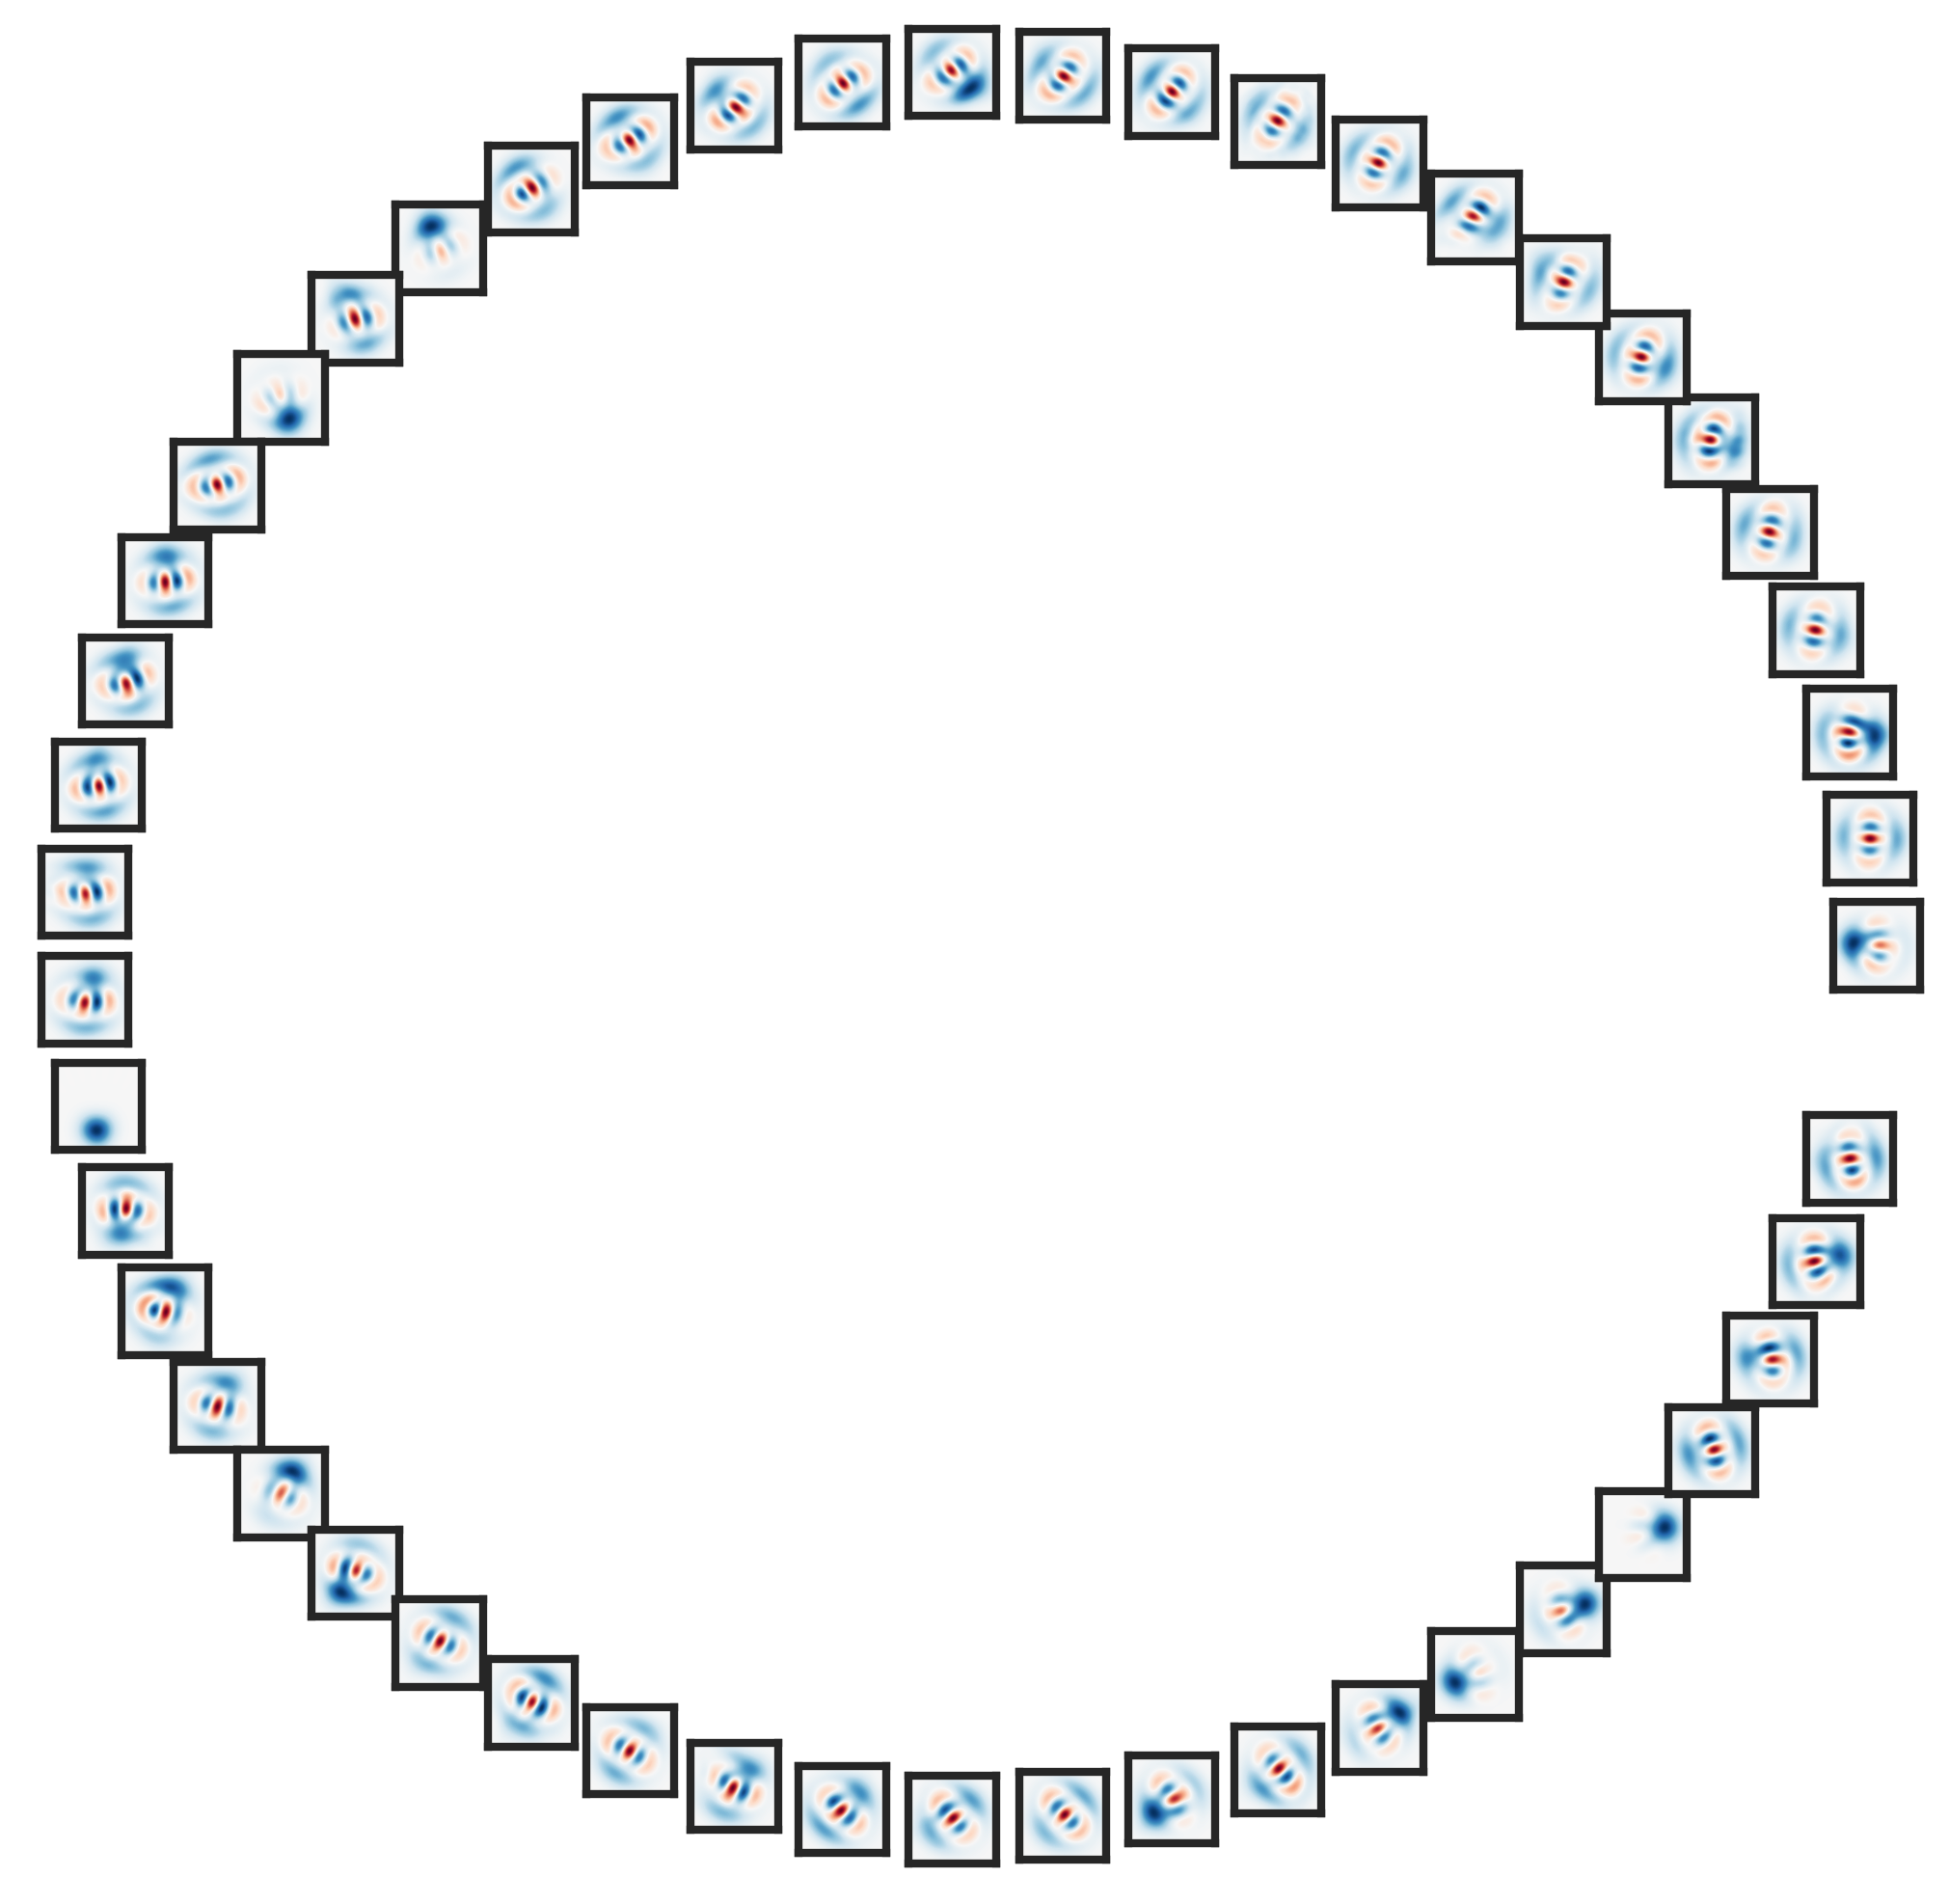

In [4]:
import math
pi = math.pi
def PointsInCircum(r,n=100):
    return [(math.cos(2*pi/n*x)*r,math.sin(2*pi/n*x)*r) for x in range(0,n+1)]

fig, ax = plt.subplots(1, 1, figsize=(4,4))

points = np.array(PointsInCircum(1, n=17))

ax.axis('off')
n=len(rhos)
r = 1

for index, rho in enumerate(rhos):
    if index%1==0 and index<len(rhos)-1:
    
        #point = (math.cos(phases[index])*r,math.sin(phases[index])*r)
        point = (math.cos(index*2*np.pi/len(rhos))*r,math.sin(index*2*np.pi/len(rhos))*r)
        
        subax = inset_axes(ax, width="100%", height="100%",
                       bbox_to_anchor=(point[0], point[1], .1, .1),
                       bbox_transform=ax.transAxes, loc=2, borderpad=0)

        subax.set_xticks([])
        subax.set_yticks([])
        xwigner = np.linspace(-3, 3, 100)
        wigner = qt.wigner( qt.Qobj(rho.mean(axis=0)[-1]), xwigner, xwigner,)
        subax.imshow(wigner,
                    cmap="RdBu", vmin=-np.max(np.abs(wigner)), vmax=np.max(np.abs(wigner)))



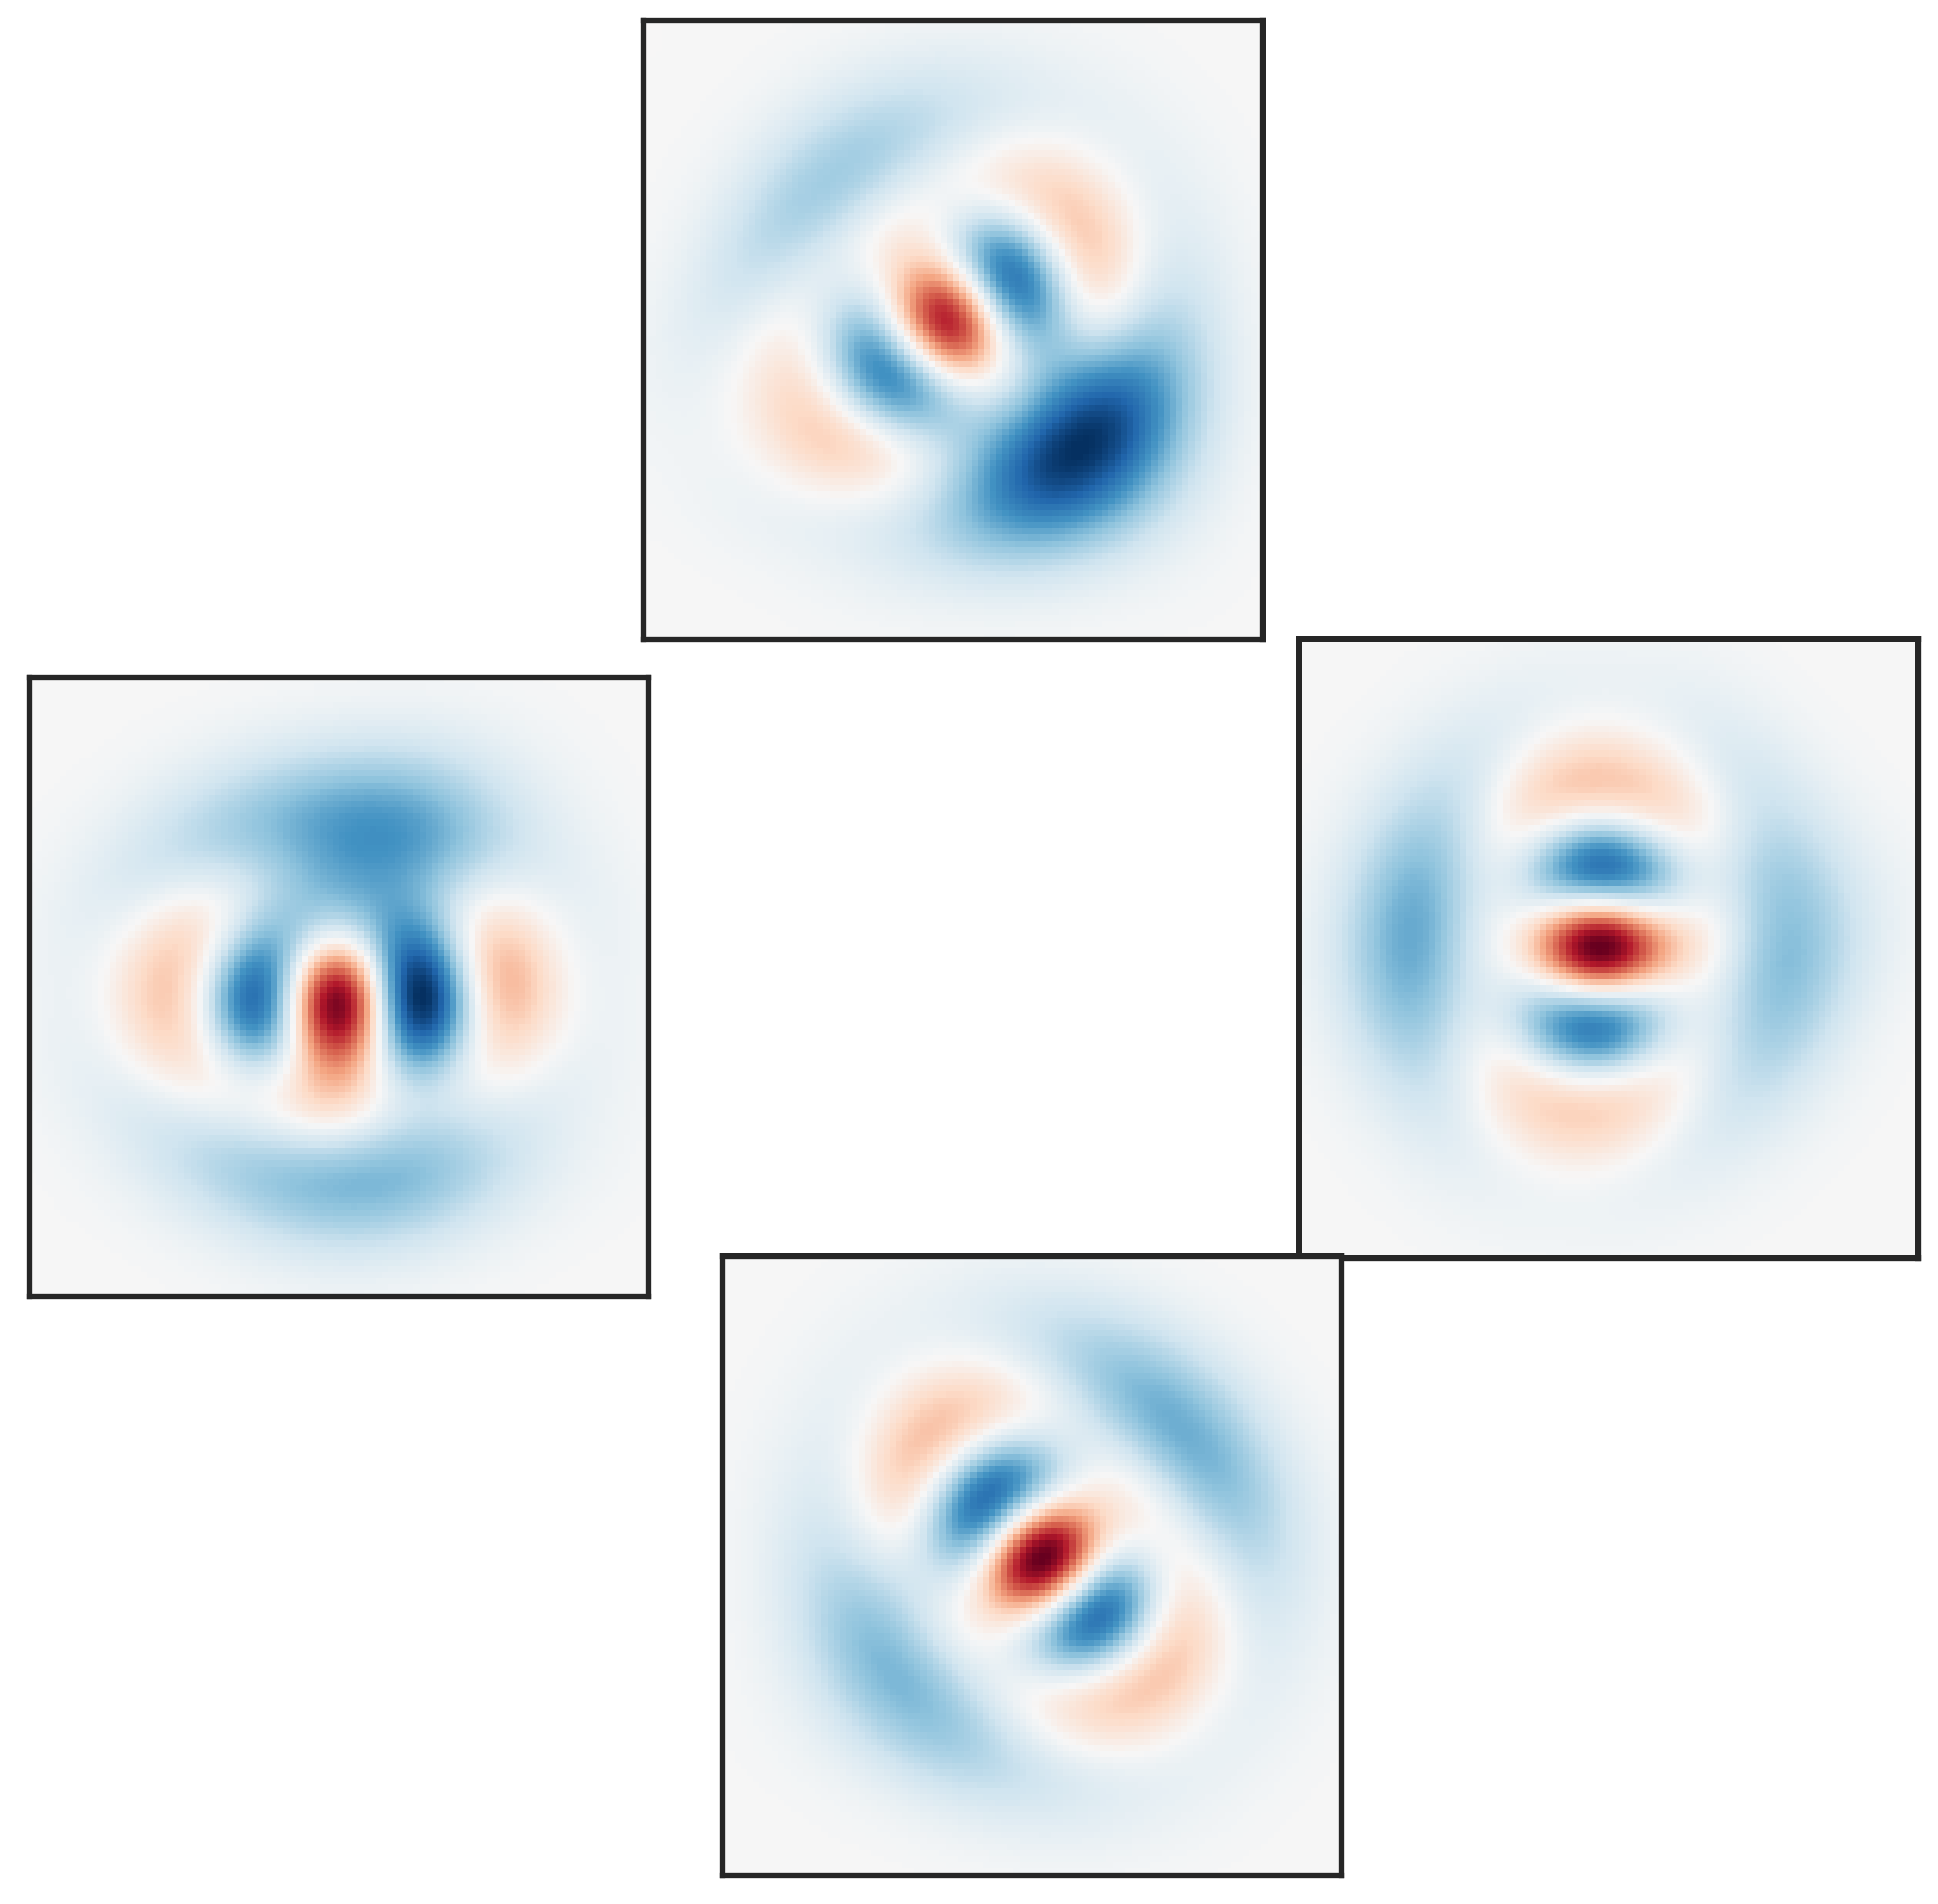

In [4]:
import math
pi = math.pi
def PointsInCircum(r,n=100):
    return [(math.cos(2*pi/n*x)*r,math.sin(2*pi/n*x)*r) for x in range(0,n+1)]

fig, ax = plt.subplots(1, 1, figsize=(4,4))

points = np.array(PointsInCircum(1, n=17))

ax.axis('off')
n=len(rhos)
r = 1
for index, rho in enumerate(rhos):
    if (index%13==0):
    
        #point = (math.cos(phases[index])*r,math.sin(phases[index])*r)
        point = (math.cos(index*2*np.pi/len(rhos))*r,math.sin(index*2*np.pi/len(rhos))*r)
        subax = inset_axes(ax, width="100%", height="100%",
                       bbox_to_anchor=(point[0], point[1], 1, 1),
                       bbox_transform=ax.transAxes, loc=2, borderpad=0)

        subax.set_xticks([])
        subax.set_yticks([])
        xwigner = np.linspace(-3, 3, 100)
        wigner = qt.wigner( qt.Qobj(rho.mean(axis=0)[-1]), xwigner, xwigner,)
        subax.imshow(wigner,
                    cmap="RdBu", vmin=-np.max(np.abs(wigner)), vmax=np.max(np.abs(wigner)))

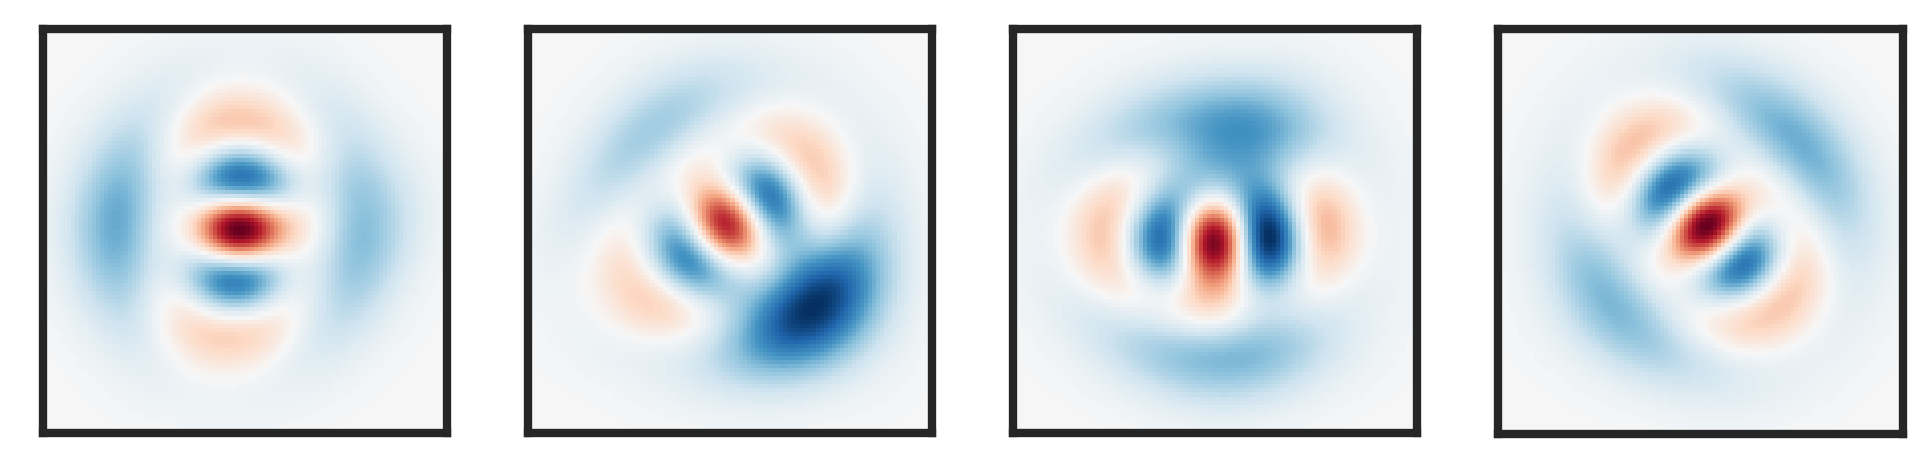

In [9]:


fig, ax = plt.subplots(1, 4, figsize=(8,3))

points = np.array(PointsInCircum(1, n=17))



for index, rho in enumerate(rhos[::13]):
    ax[index].set_xticks([])
    ax[index].set_yticks([])
    xwigner = np.linspace(-3, 3, 100)
    wigner = qt.wigner( qt.Qobj(rho.mean(axis=0)[-1]), xwigner, xwigner,)
    ax[index].imshow(wigner,
                cmap="RdBu", vmin=-np.max(np.abs(wigner)), vmax=np.max(np.abs(wigner)))


1.0

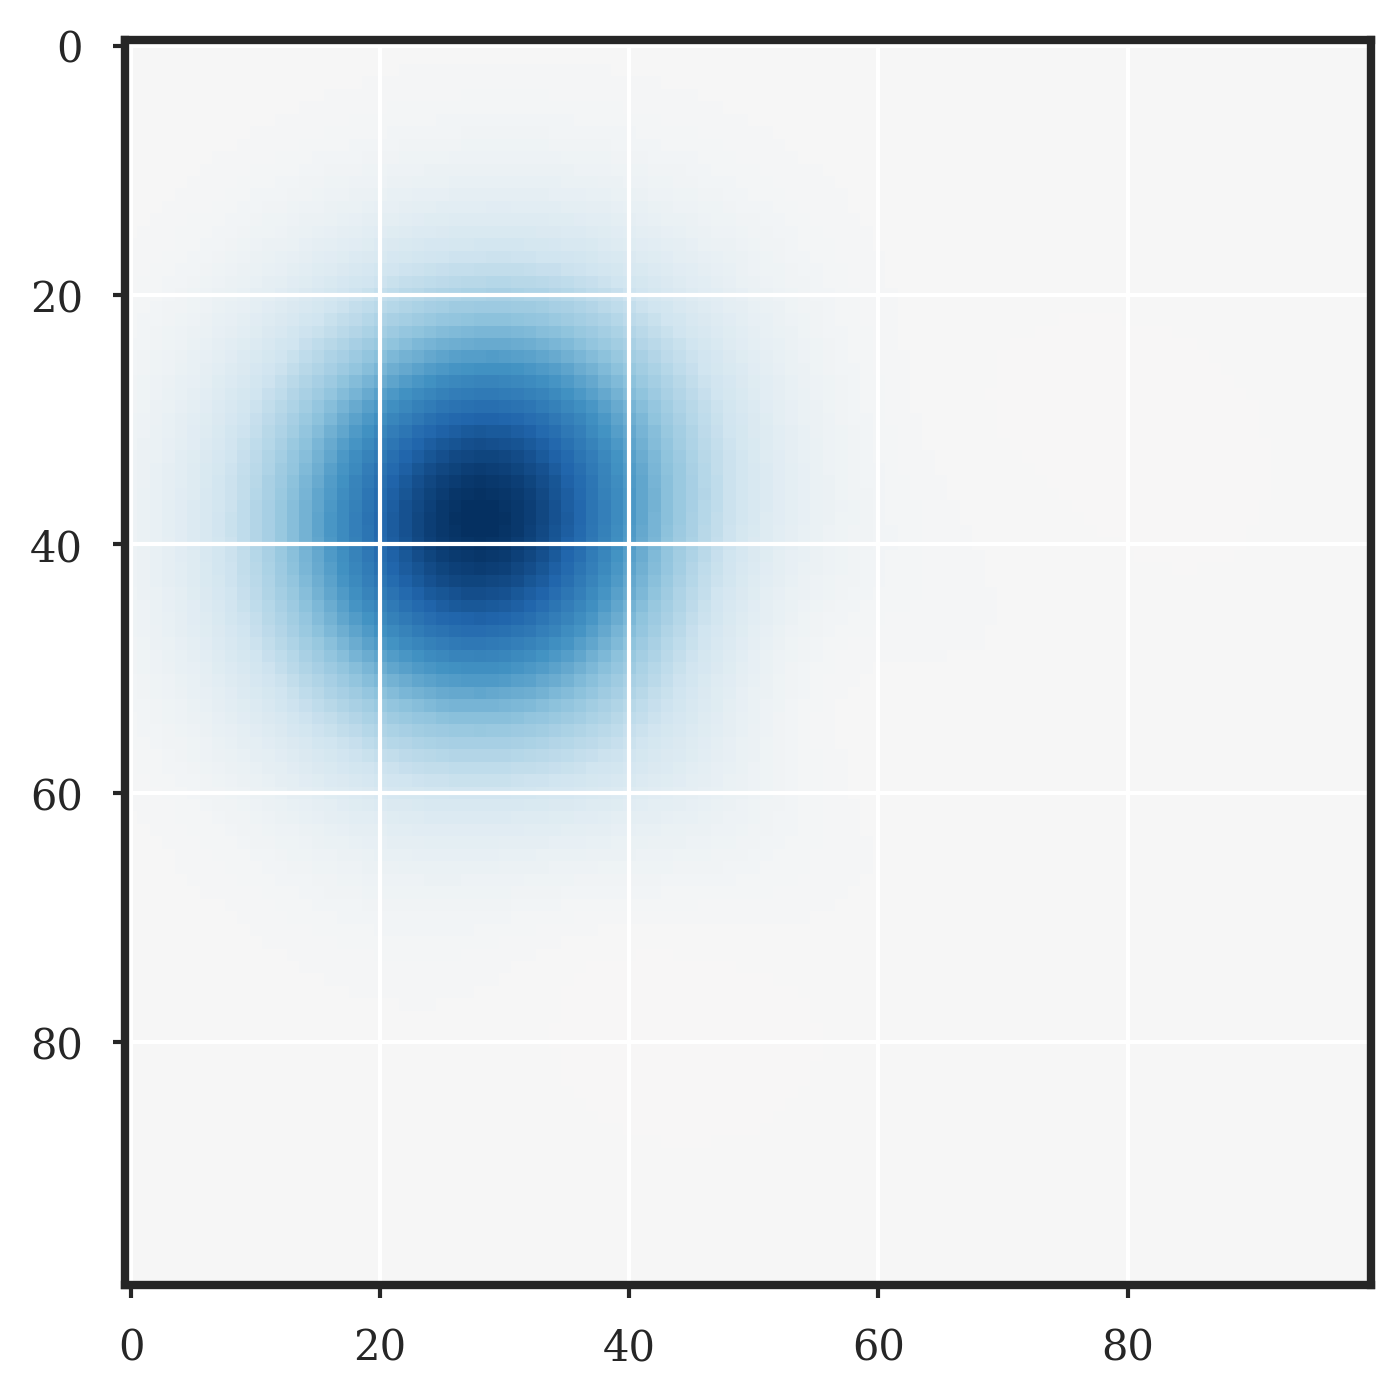

In [32]:
xwigner = np.linspace(-3, 3, 100)
wigner = qt.wigner( qt.Qobj(rhos[8].mean(axis=0)[-1]), xwigner, xwigner,)
plt.imshow(wigner,
            cmap="RdBu", vmin=-np.max(np.abs(wigner)), vmax=np.max(np.abs(wigner)))

phases[8]

In [33]:
ntraj=100


args= load_info(direc, print=False)
args["T_max"]=args["T_max"]*5
args["timesteps"]=int(args["timesteps"]*5)
args["multiplier"]=args["multiplier"]*5
env = SubprocVecEnv([make_env(args, i) for i in range(ntraj)], start_method="fork")
timesteps=env.get_attr("T")[0]
Nstates=env.get_attr("Nstates")[0]
substeps=env.get_attr("numberPhysicsMicroSteps")[0]
num_actions=env.get_attr("num_actions")[0]




rhos_temp=np.zeros((1, ntraj, timesteps, Nstates, Nstates), dtype="complex")


model = models[8]
j=8

direc = folder + "/" + subfolders[j]
args= load_info(direc, print=False)
args["T_max"]=args["T_max"]*5
args["timesteps"]=int(args["timesteps"]*5)
args["multiplier"]=args["multiplier"]*5
env = SubprocVecEnv([make_env(args, i) for i in range(ntraj)], start_method="fork")


obs=env.reset()
for i in range(args["timesteps"]):
    action=model.predict(obs, deterministic=True)
    rhos_temp[0, :, i]=env.get_attr("Rho")
    obs, r, done, _ =env.step(action[0])


# probabilities[j] = np.array(env.get_attr("probabilities"))
# actions[j]=np.array(env.get_attr("actions_plot"))
# fidelities[j]=np.array(env.get_attr("fidelities"))




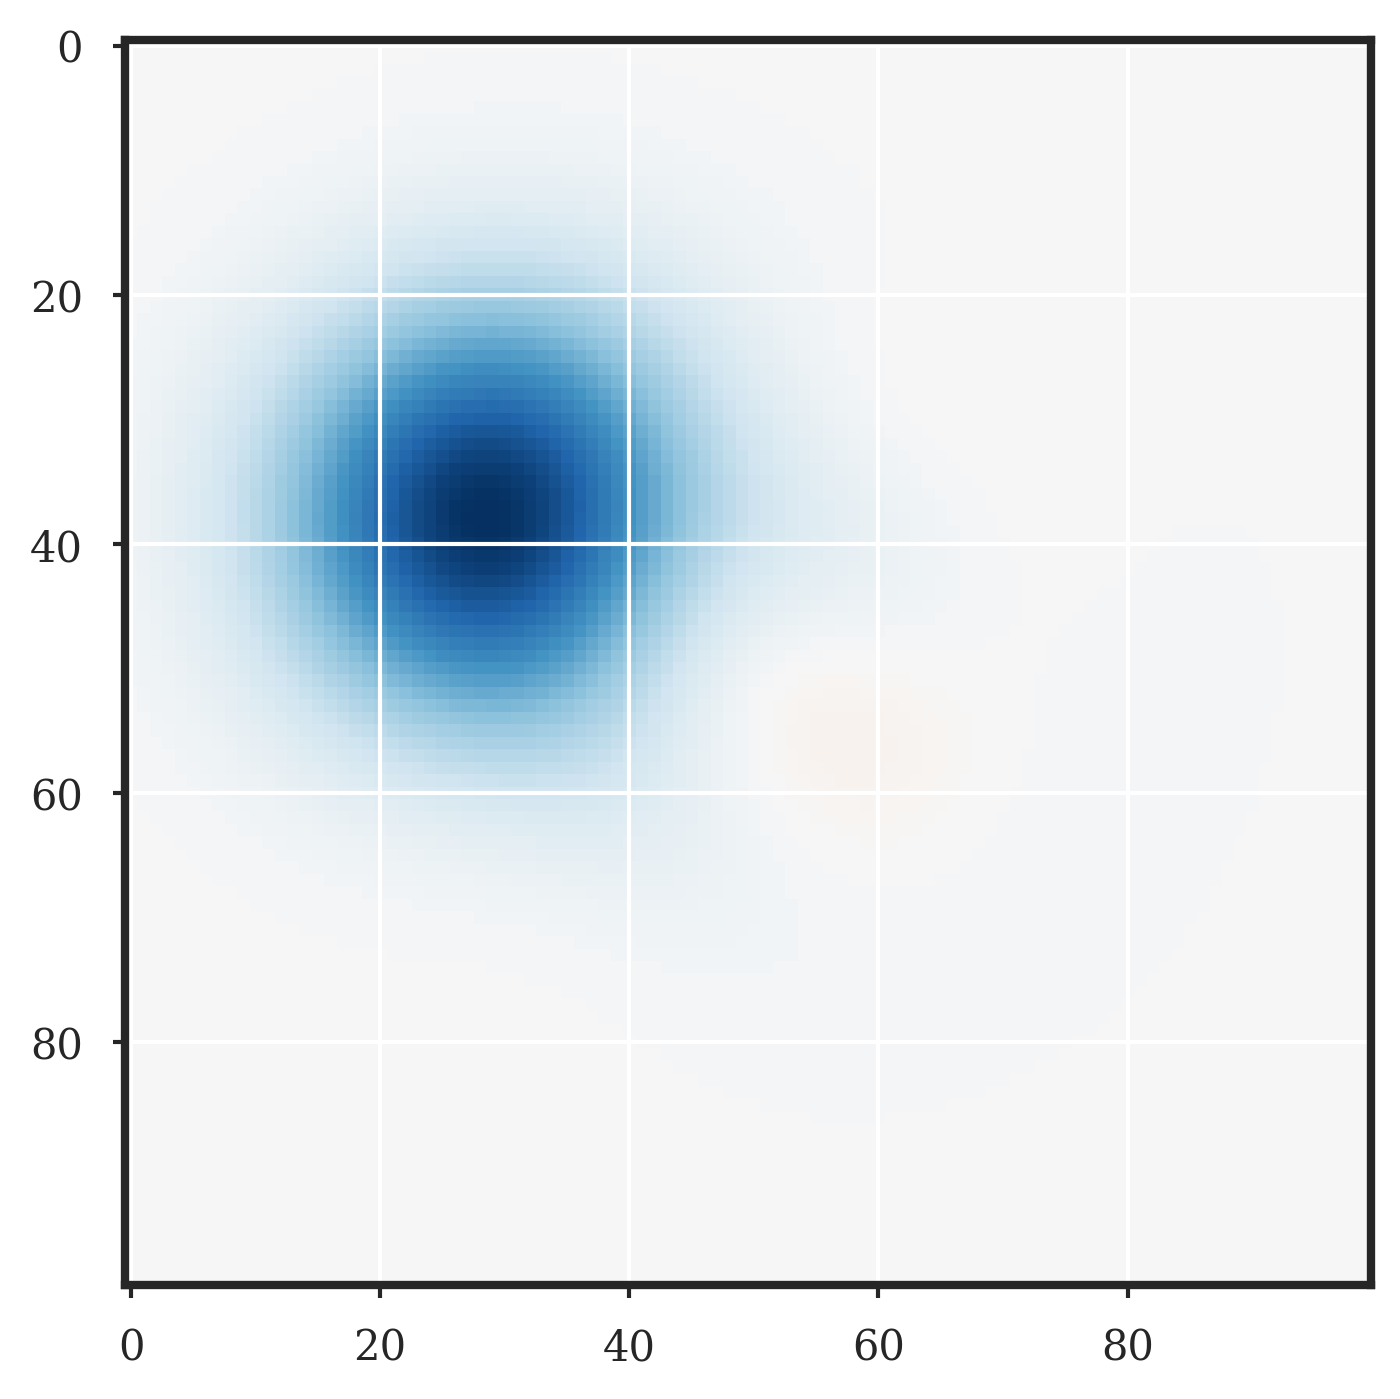

In [36]:
xwigner = np.linspace(-3, 3, 100)
wigner = qt.wigner( qt.Qobj(rhos_temp[0].mean(axis=0)[-1]), xwigner, xwigner,)
plt.imshow(wigner,
            cmap="RdBu", vmin=-np.max(np.abs(wigner)), vmax=np.max(np.abs(wigner)))



In [ ]:
np.save("data/rhos_different_phases_4.npy", rhos)
np.save("data/probabilities_different_phases_4.npy", probabilities)
np.save("data/action_different_phasess_4.npy", actions)
np.save("data/fidelities_different_phases_4.npy", fidelities)